Dataset: https://www.kaggle.com/datasets/trainingdatapro/computed-tomography-ct-of-the-brain

# CNN for Aneurysm Classification

In [2]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


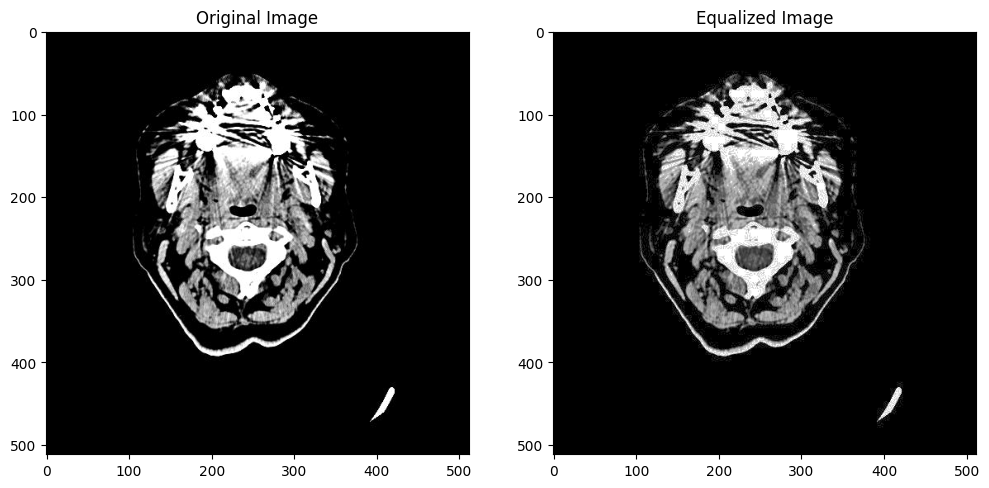

In [3]:
image = cv2.imread('/kaggle/input/computed-tomography-ct-of-the-brain/files/aneurysm/0.jpg', cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.show()

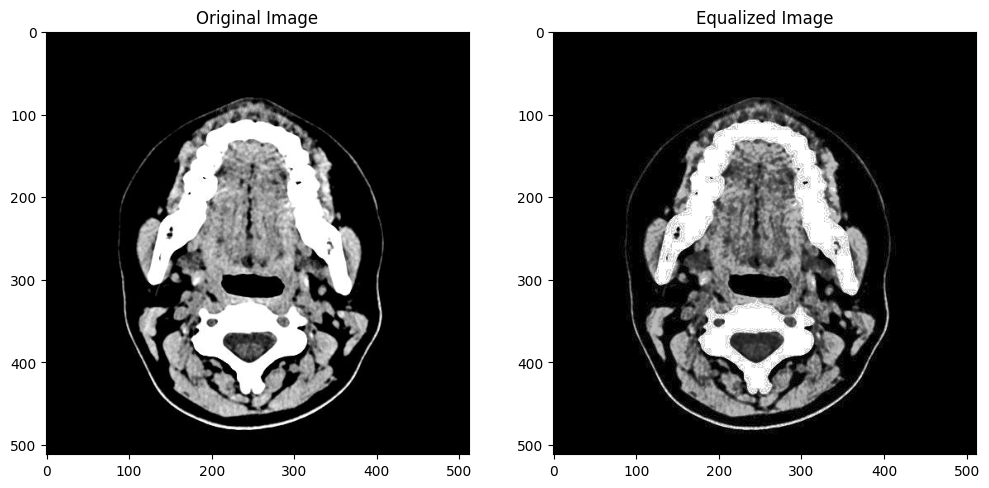

In [4]:
image = cv2.imread('/kaggle/input/computed-tomography-ct-of-the-brain/files/cancer/0.jpg', cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.show()

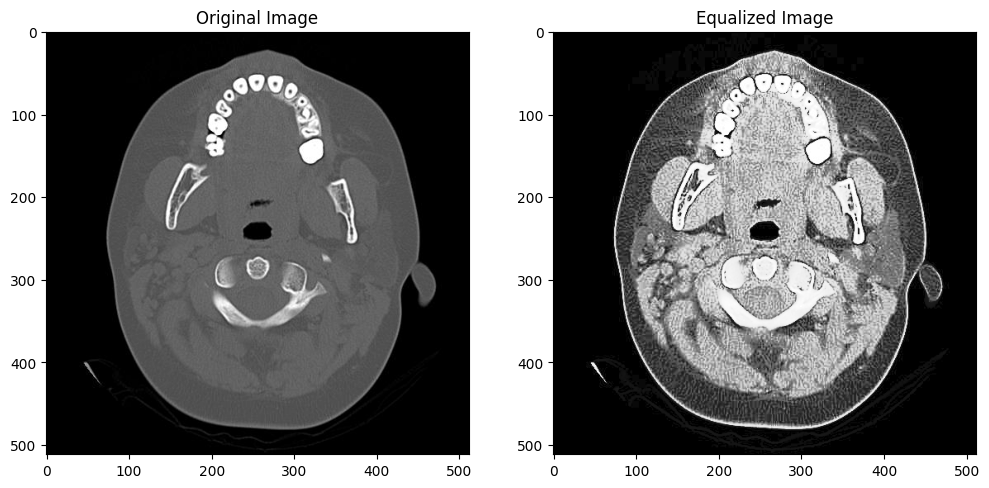

In [5]:
image = cv2.imread('/kaggle/input/computed-tomography-ct-of-the-brain/files/tumor/0.jpg', cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.show()

In [21]:
image_directory = "/kaggle/input/computed-tomography-ct-of-the-brain/files"



dataset = tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels="inferred",
    label_mode="categorical",
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset="training"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels="inferred",
    label_mode="categorical",
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset="validation"
)

val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take((2*val_batches) // 3)
validation_dataset = validation_dataset.skip((2*val_batches) // 3)

Found 259 files belonging to 3 classes.
Using 182 files for training.
Found 259 files belonging to 3 classes.
Using 77 files for validation.


In [22]:
dataset.class_names

['aneurysm', 'cancer', 'tumor']

In [24]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=3, activation="softmax")
])

In [25]:
model.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=20
)

Epoch 1/20
6/6 [==============================] - 5s 253ms/step - loss: 689.0566 - accuracy: 0.5000 - val_loss: 2.6958 - val_accuracy: 0.7692
Epoch 2/20
6/6 [==============================] - 1s 208ms/step - loss: 3.3954 - accuracy: 0.6484 - val_loss: 0.1716 - val_accuracy: 0.9231
Epoch 3/20
6/6 [==============================] - 1s 207ms/step - loss: 0.6501 - accuracy: 0.7912 - val_loss: 0.0922 - val_accuracy: 1.0000
Epoch 4/20
6/6 [==============================] - 1s 205ms/step - loss: 0.4112 - accuracy: 0.9011 - val_loss: 0.2685 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 1s 214ms/step - loss: 0.2675 - accuracy: 0.9341 - val_loss: 0.0294 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 1s 205ms/step - loss: 0.2035 - accuracy: 0.9231 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 1s 212ms/step - loss: 0.1911 - accuracy: 0.9505 - val_loss: 0.7745 - val_accuracy: 0.9231
Epoch 8/20
6/6 [==

In [26]:
Model_evaluation = model.evaluate(test_dataset)
print(f"Loss: {Model_evaluation[0]*100:.2f} %\nAccuracy: {Model_evaluation[1]:.4f}")

2/2 [==============================] - 0s 80ms/step - loss: 0.0484 - accuracy: 0.9688
Loss: 4.84 %
Accuracy: 0.9688
